<a href="https://colab.research.google.com/github/mydevfair/data-driven-ai/blob/main/Fairhurst_U2264890_CHS2406_2526.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Cancallation Prediction

**Load Data**

Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.

In [206]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
# Import library
import pandas as pd

# Read the CSV file into the Dataframe
fulldata_df = pd.read_csv("/content/hotel_bookings.csv")

# 1. Data Pre-processing (25%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.

In [208]:
# Lets start by viewing the head of the dataframe
fulldata_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [209]:
# 1. Check the shape of the dataset
print("Dataset Shape:")
print(f"Rows: {fulldata_df.shape[0]}")
print(f"Columns: {fulldata_df.shape[1]}")
print("\n" + "="*50 + "\n")

# 2. Check data types and non-null counts
print("Data Types and Non-Null Counts:")
print(fulldata_df.info())
print("\n" + "="*50 + "\n")

# 3. Get statistical summary
print("Statistical Summary:")
print(fulldata_df.describe())

Dataset Shape:
Rows: 119390
Columns: 32


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babi

# Data Leakage an Irrelevant Info
After  revising the dataframe I'm going to choose to drop reservation_status and reservation_status_date because these tell us the answer we are trying to predict. I'm also dropping agent and company because these seem to be just ID numbers or similar.


In [210]:

columns_to_drop = ['reservation_status', 'reservation_status_date']

print(f"\n=== DROPPING LEAKAGE COLUMNS ===")
print(f"Columns to drop: {columns_to_drop}")
print(f"Shape before: {fulldata_df.shape}")

fulldata_df.drop(columns=['agent', 'company', 'reservation_status', 'reservation_status_date'], inplace=True)

print(f"Shape after: {fulldata_df.shape}")


=== DROPPING LEAKAGE COLUMNS ===
Columns to drop: ['reservation_status', 'reservation_status_date']
Shape before: (119390, 32)
Shape after: (119390, 28)


## Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

In [211]:
print("=== UNIQUE VALUES ===\n")

# Method 1: Using .unique() for selected columns
print("1. Checking unique values in key columns:\n")

# Check hotel types
print("hotel:")
print(fulldata_df['hotel'].unique())
print()

# Check meal types
print("meal:")
print(fulldata_df['meal'].unique())
print()

# Check market segment
print("market_segment:")
print(fulldata_df['market_segment'].unique())
print()

# Check distribution channel
print("distribution_channel:")
print(fulldata_df['distribution_channel'].unique())
print()

# Check customer type
print("customer_type:")
print(fulldata_df['customer_type'].unique())
print()

# Method 2: Using .value_counts() to see frequency
print("\n2. Using value_counts() to see frequency:\n")

# Check adults distribution
print("adults value counts:")
print(fulldata_df['adults'].value_counts().sort_index())
print()

# Check children distribution
print("children value counts:")
print(fulldata_df['children'].value_counts().sort_index())
print()

# Check babies distribution
print("babies value counts:")
print(fulldata_df['babies'].value_counts().sort_index())
print()

# Check meal types with frequency
print("meal value counts:")
print(fulldata_df['meal'].value_counts())
print()

# Check stays in weekend nights
print("stays_in_weekend_nights value counts:")
print(fulldata_df['stays_in_weekend_nights'].value_counts().sort_index())
print()

# Check stays in week nights
print("stays_in_week_nights value counts:")
print(fulldata_df['stays_in_week_nights'].value_counts().sort_index().head(10))

=== UNIQUE VALUES ===

1. Checking unique values in key columns:

hotel:
['Resort Hotel' 'City Hotel']

meal:
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment:
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel:
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

customer_type:
['Transient' 'Contract' 'Transient-Party' 'Group']


2. Using value_counts() to see frequency:

adults value counts:
adults
0       403
1     23027
2     89680
3      6202
4        62
5         2
6         1
10        1
20        2
26        5
27        2
40        1
50        1
55        1
Name: count, dtype: int64

children value counts:
children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

babies value counts:
babies
0     118473
1        900
2         15
9          1
10         1
Name: count, dtype: int64

meal value counts:
meal
BB           92310
HB           14463
SC           106

From this data we can observe that the adults column has some extreme values that do not seem right. As do children and babies. Meal had an undefined category in it showing there is some missed data.

## 1.1 Missing Values (10%)

Identify and handle missing values.

In [212]:
# Check for explicit NaN values
print("=== EXPLICIT MISSING VALUES (NaN) ===")
print(fulldata_df.isnull().sum())
print(f"\nTotal missing values: {fulldata_df.isnull().sum().sum()}")

# Get only object (text) columns
object_columns = fulldata_df.select_dtypes(include=['object']).columns

undefined_counts = {}

for col in object_columns:
    undefined_count = (fulldata_df[col] == 'Undefined').sum()
    if undefined_count > 0:
        undefined_counts[col] = undefined_count

# Display results
if undefined_counts:
    print("Columns with 'Undefined' values:")
    for col, count in undefined_counts.items():
        percentage = (count / len(fulldata_df)) * 100
        print(f"  {col}: {count} ({percentage:.2f}%)")
    print(f"\nTotal 'Undefined' values: {sum(undefined_counts.values())}")
else:
    print("No 'Undefined' values found in any column")

# Show which object columns we checked
print(f"\n--- Checked {len(object_columns)} object columns:")
print(list(object_columns))

# Check how many rows have ANY missing value
print("=== IMPACT ANALYSIS: Dropping Rows with Missing Values ===\n")

# Create a combined missing value mask
# For NaN values
nan_mask = fulldata_df.isnull().any(axis=1)

# For 'Undefined' values
undefined_mask = (
    (fulldata_df['meal'] == 'Undefined') |
    (fulldata_df['market_segment'] == 'Undefined') |
    (fulldata_df['distribution_channel'] == 'Undefined')
)

# Combined: rows with either NaN or 'Undefined'
any_missing_mask = nan_mask | undefined_mask

rows_with_missing = any_missing_mask.sum()
percentage_loss = (rows_with_missing / len(fulldata_df)) * 100

print(f"Total rows in dataset: {len(fulldata_df)}")
print(f"Rows with ANY missing value: {rows_with_missing}")
print(f"Percentage of data lost if dropped: {percentage_loss:.2f}%")
print(f"Rows remaining after drop: {len(fulldata_df) - rows_with_missing}")

# Check overlap between NaN and Undefined
print("\n--- Breakdown ---")
print(f"Rows with only NaN: {(nan_mask & ~undefined_mask).sum()}")
print(f"Rows with only 'Undefined': {(undefined_mask & ~nan_mask).sum()}")
print(f"Rows with BOTH NaN and 'Undefined': {(nan_mask & undefined_mask).sum()}")

=== EXPLICIT MISSING VALUES (NaN) ===
hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr         

# Handling Missing Values
There are 8 rows with both types of missing data, I'm going to drop these as I dont want to replace more than one value and in dropping these rows I won't lose much data at all. I'm also going to remove the 4 rows with missing children data for the same reason.

In [213]:
print("=" * 60)
print("SECTION 1.1: HANDLING MISSING VALUES")
print("=" * 60)

# Initial state
print("\n--- INITIAL DATA STATE ---")
print(f"Total rows: {len(fulldata_df)}")
print(f"Total columns: {len(fulldata_df.columns)}")

# Identify all missing values
print("\n--- MISSING VALUES IDENTIFIED ---")
print("\n1. NaN (Explicit Missing Values):")
nan_summary = fulldata_df.isnull().sum()
nan_summary = nan_summary[nan_summary > 0]
if len(nan_summary) > 0:
    for col, count in nan_summary.items():
        print(f"   {col}: {count}")
else:
    print("   None found")

print("\n2. 'Undefined' (Hidden Missing Values):")
undefined_cols = ['meal', 'market_segment', 'distribution_channel']
undefined_found = False
for col in undefined_cols:
    count = (fulldata_df[col] == 'Undefined').sum()
    if count > 0:
        print(f"   {col}: {count}")
        undefined_found = True
if not undefined_found:
    print("   None found")

# STRATEGY
print("\n" + "=" * 60)
print("STRATEGY: MIXED APPROACH")
print("=" * 60)

# Strategy 1: Drop rows for minor missing values
print("\n--- Strategy 1: DROP ROWS ---")
print("Columns: children, market_segment, distribution_channel")
print("Justification: Very small number of missing values (<0.01% each)")

# Create mask for rows to drop
drop_mask = (
    fulldata_df['children'].isna() |
    (fulldata_df['market_segment'] == 'Undefined') |
    (fulldata_df['distribution_channel'] == 'Undefined')
)

print(f"\nRows to remove: {drop_mask.sum()}")

# Drop the rows
fulldata_df = fulldata_df[~drop_mask].copy()

print(f"Rows after removal: {len(fulldata_df)}")

# Strategy 2: Impute country with 'Unknown' (FIXED - no warning)
print("\n--- Strategy 2: IMPUTE 'country' (Categorical) ---")
print("Method: Replace NaN with 'Unknown'")
print("Justification: Country is important predictor; preserves data")

country_missing = fulldata_df['country'].isna().sum()
print(f"\nMissing 'country' values before: {country_missing}")

# Fixed method - no warning
fulldata_df.loc[fulldata_df['country'].isna(), 'country'] = 'Unknown'

print(f"Missing 'country' values after: {fulldata_df['country'].isna().sum()}")

# Strategy 3: Keep 'Undefined' in meal as valid category
print("\n--- Strategy 3: KEEP 'Undefined' in 'meal' ---")
print("Method: Treat 'Undefined' as valid category")
print("Justification: Represents customers with no meal preference (meaningful)")

undefined_meal_count = (fulldata_df['meal'] == 'Undefined').sum()
print(f"\n'Undefined' values in 'meal': {undefined_meal_count}")
print("Action: No change - keeping as valid category")

# VERIFICATION
print("\n" + "=" * 60)
print("VERIFICATION: POST-CLEANING CHECK")
print("=" * 60)

print("\n--- Final Data State ---")
print(f"Rows after cleaning: {len(fulldata_df)}")
print(f"Rows removed: {119390 - len(fulldata_df)}")
print(f"Percentage retained: {(len(fulldata_df)/119390)*100:.4f}%")

print("\n--- Missing Values Check ---")
remaining_nan = fulldata_df.isnull().sum().sum()
print(f"Remaining NaN values: {remaining_nan}")

print("\n'Undefined' values remaining:")
for col in ['meal', 'market_segment', 'distribution_channel']:
    count = (fulldata_df[col] == 'Undefined').sum()
    if count > 0:
        print(f"   {col}: {count}")

if remaining_nan == 0:
    print("\nSUCCESS: All NaN values handled!")
else:
    print("\nWARNING: Some NaN values remain")

print("\n" + "=" * 60)

SECTION 1.1: HANDLING MISSING VALUES

--- INITIAL DATA STATE ---
Total rows: 119390
Total columns: 28

--- MISSING VALUES IDENTIFIED ---

1. NaN (Explicit Missing Values):
   children: 4
   country: 488

2. 'Undefined' (Hidden Missing Values):
   meal: 1169
   market_segment: 2
   distribution_channel: 5

STRATEGY: MIXED APPROACH

--- Strategy 1: DROP ROWS ---
Columns: children, market_segment, distribution_channel
Justification: Very small number of missing values (<0.01% each)

Rows to remove: 5
Rows after removal: 119385

--- Strategy 2: IMPUTE 'country' (Categorical) ---
Method: Replace NaN with 'Unknown'
Justification: Country is important predictor; preserves data

Missing 'country' values before: 488
Missing 'country' values after: 0

--- Strategy 3: KEEP 'Undefined' in 'meal' ---
Method: Treat 'Undefined' as valid category
Justification: Represents customers with no meal preference (meaningful)

'Undefined' values in 'meal': 1169
Action: No change - keeping as valid category

V

After handling missing values removing the smaller amounts of rows with missing data worked out better than expected as only 5 rows were removed as some of the other missing values were in the same rows

## 1.2 Removing Inconsistent values and Outliers (10%)

Detecting inconsistencies can be achieved through a variety of methods. Some can be identified by examining unique values within each column, while others may require a solid understanding of the problem domain. Since you might not be an expert in the hotel or hospitality industry, here are some helpful hints:

Hints:

1. Check for incomplete bookings, such as reservations with zero adults, babies, or children.
2. Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights.'



Here I have checked for inconsstant values in rows that would be impossible
i.e. bookings with 0 adults and also 0 weeknights or weeknds
I then check for ovelapping rows with both of these traits

In [214]:
print("=" * 60)
print("SECTION 1.2: INCONSISTENT VALUES")
print("=" * 60)

print("\n--- INITIAL DATA STATE ---")
print(f"Total rows: {len(fulldata_df)}")

print("\n--- EXPLORING GUEST COMPOSITION ---")

# Check for bookings with zero guests
print("\nChecking for impossible bookings...")

# Count bookings with 0 adults
zero_adults = (fulldata_df['adults'] == 0).sum()
print(f"\nBookings with 0 adults: {zero_adults}")

# Count bookings with 0 adults AND 0 children AND 0 babies
no_guests = ((fulldata_df['adults'] == 0) &
             (fulldata_df['children'] == 0) &
             (fulldata_df['babies'] == 0)).sum()
print(f"Bookings with 0 adults AND 0 children AND 0 babies: {no_guests}")

print("\n--- EXPLORING STAY DURATION ---")

# Check for bookings with zero nights
zero_nights = ((fulldata_df['stays_in_weekend_nights'] == 0) &
               (fulldata_df['stays_in_week_nights'] == 0)).sum()
print(f"\nBookings with 0 weekend nights AND 0 week nights: {zero_nights}")

# Let's see some examples of these problematic rows
if no_guests > 0:
    print("\n--- EXAMPLE: Bookings with no guests ---")
    print(fulldata_df[(fulldata_df['adults'] == 0) &
                      (fulldata_df['children'] == 0) &
                      (fulldata_df['babies'] == 0)][['adults', 'children', 'babies', 'is_canceled']].head())

if zero_nights > 0:
    print("\n--- EXAMPLE: Bookings with zero nights ---")
    print(fulldata_df[(fulldata_df['stays_in_weekend_nights'] == 0) &
                      (fulldata_df['stays_in_week_nights'] == 0)][['stays_in_weekend_nights', 'stays_in_week_nights', 'is_canceled']].head())

print("\n")
print("=" * 60)
print("CHECKING FOR OVERLAP IN INCONSISTENT DATA")
print("=" * 60)

# Create masks for each type of inconsistency
no_guests_mask = ((fulldata_df['adults'] == 0) &
                  (fulldata_df['children'] == 0) &
                  (fulldata_df['babies'] == 0))

zero_nights_mask = ((fulldata_df['stays_in_weekend_nights'] == 0) &
                    (fulldata_df['stays_in_week_nights'] == 0))

# Check overlap
print(f"\nBookings with no guests: {no_guests_mask.sum()}")
print(f"Bookings with zero nights: {zero_nights_mask.sum()}")
print(f"Bookings with BOTH issues: {(no_guests_mask & zero_nights_mask).sum()}")

# Combined - rows with ANY inconsistency
any_inconsistency_mask = no_guests_mask | zero_nights_mask

print(f"\nTotal unique rows with inconsistencies: {any_inconsistency_mask.sum()}")
print(f"Expected if removed: {119385 - any_inconsistency_mask.sum()} rows")

SECTION 1.2: INCONSISTENT VALUES

--- INITIAL DATA STATE ---
Total rows: 119385

--- EXPLORING GUEST COMPOSITION ---

Checking for impossible bookings...

Bookings with 0 adults: 403
Bookings with 0 adults AND 0 children AND 0 babies: 180

--- EXPLORING STAY DURATION ---

Bookings with 0 weekend nights AND 0 week nights: 715

--- EXAMPLE: Bookings with no guests ---
      adults  children  babies  is_canceled
2224       0       0.0       0            0
2409       0       0.0       0            0
3181       0       0.0       0            0
3684       0       0.0       0            0
3708       0       0.0       0            0

--- EXAMPLE: Bookings with zero nights ---
     stays_in_weekend_nights  stays_in_week_nights  is_canceled
0                          0                     0            0
1                          0                     0            0
167                        0                     0            0
168                        0                     0            0
196

So there are 70 rows that overlap  and 825 rows in total which I will remove from the dataset

In [215]:
print("=" * 60)
print("REMOVING INCONSISTENT DATA")
print("=" * 60)

print("\n--- INCONSISTENCIES IDENTIFIED ---")
print("1. Bookings with 0 adults, 0 children, AND 0 babies (no guests)")
print("2. Bookings with 0 weekend nights AND 0 week nights (zero stay)")
print("\nJustification: These bookings are logically impossible")

# Create combined mask for all inconsistencies
inconsistent_mask = (
    ((fulldata_df['adults'] == 0) &
     (fulldata_df['children'] == 0) &
     (fulldata_df['babies'] == 0)) |
    ((fulldata_df['stays_in_weekend_nights'] == 0) &
     (fulldata_df['stays_in_week_nights'] == 0))
)

print(f"\nRows before removal: {len(fulldata_df)}")
print(f"Inconsistent rows to remove: {inconsistent_mask.sum()}")

# Remove inconsistent rows
fulldata_df = fulldata_df[~inconsistent_mask].copy()

print(f"Rows after removal: {len(fulldata_df)}")
print(f"Rows removed: {119385 - len(fulldata_df)}")
print(f"Percentage retained: {(len(fulldata_df)/119385)*100:.2f}%")

# VERIFICATION
print("\n" + "=" * 60)
print("VERIFICATION: CHECKING FOR REMAINING INCONSISTENCIES")
print("=" * 60)

# Verify no guests bookings are gone
no_guests_remaining = ((fulldata_df['adults'] == 0) &
                       (fulldata_df['children'] == 0) &
                       (fulldata_df['babies'] == 0)).sum()

# Verify zero nights bookings are gone
zero_nights_remaining = ((fulldata_df['stays_in_weekend_nights'] == 0) &
                         (fulldata_df['stays_in_week_nights'] == 0)).sum()

print(f"\nBookings with no guests remaining: {no_guests_remaining}")
print(f"Bookings with zero nights remaining: {zero_nights_remaining}")

if no_guests_remaining == 0 and zero_nights_remaining == 0:
    print("\nSUCCESS: All inconsistent data removed!")
else:
    print("\nWARNING: Some inconsistent data remains!")


REMOVING INCONSISTENT DATA

--- INCONSISTENCIES IDENTIFIED ---
1. Bookings with 0 adults, 0 children, AND 0 babies (no guests)
2. Bookings with 0 weekend nights AND 0 week nights (zero stay)

Justification: These bookings are logically impossible

Rows before removal: 119385
Inconsistent rows to remove: 825
Rows after removal: 118560
Rows removed: 825
Percentage retained: 99.31%

VERIFICATION: CHECKING FOR REMAINING INCONSISTENCIES

Bookings with no guests remaining: 0
Bookings with zero nights remaining: 0

SUCCESS: All inconsistent data removed!


I then check for outliers

In [216]:
print("=" * 60)
print("DETECTING OUTLIERS - ALL NUMERICAL COLUMNS")
print("=" * 60)

# Get ALL numerical columns
numerical_cols = fulldata_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nTotal numerical columns: {len(numerical_cols)}")
print(f"Columns: {numerical_cols}\n")

# Examine each numerical column
for col in numerical_cols:
    print("=" * 60)
    print(f"{col.upper()}")
    print("=" * 60)

    stats = fulldata_df[col].describe()
    print(stats)

    # Calculate potential outliers using IQR method
    Q1 = fulldata_df[col].quantile(0.25)
    Q3 = fulldata_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = fulldata_df[(fulldata_df[col] < lower_bound) | (fulldata_df[col] > upper_bound)]

    print(f"\nIQR Method:")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    print(f"  Potential outliers: {len(outliers)} ({len(outliers)/len(fulldata_df)*100:.2f}%)")
    print()

DETECTING OUTLIERS - ALL NUMERICAL COLUMNS

Total numerical columns: 18
Columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

IS_CANCELED
count    118560.000000
mean          0.372571
std           0.483491
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64

IQR Method:
  Lower bound: -1.50
  Upper bound: 2.50
  Potential outliers: 0 (0.00%)

LEAD_TIME
count    118560.000000
mean        104.509270
std         106.916146
min           0.000000
25%          18.000000
50%          70.000000
75%         161.000000
max         709.000000
Name: lead_time, dtype: fl

Box-plot visual

BOX PLOT VISUALIZATIONS FOR OUTLIER DETECTION


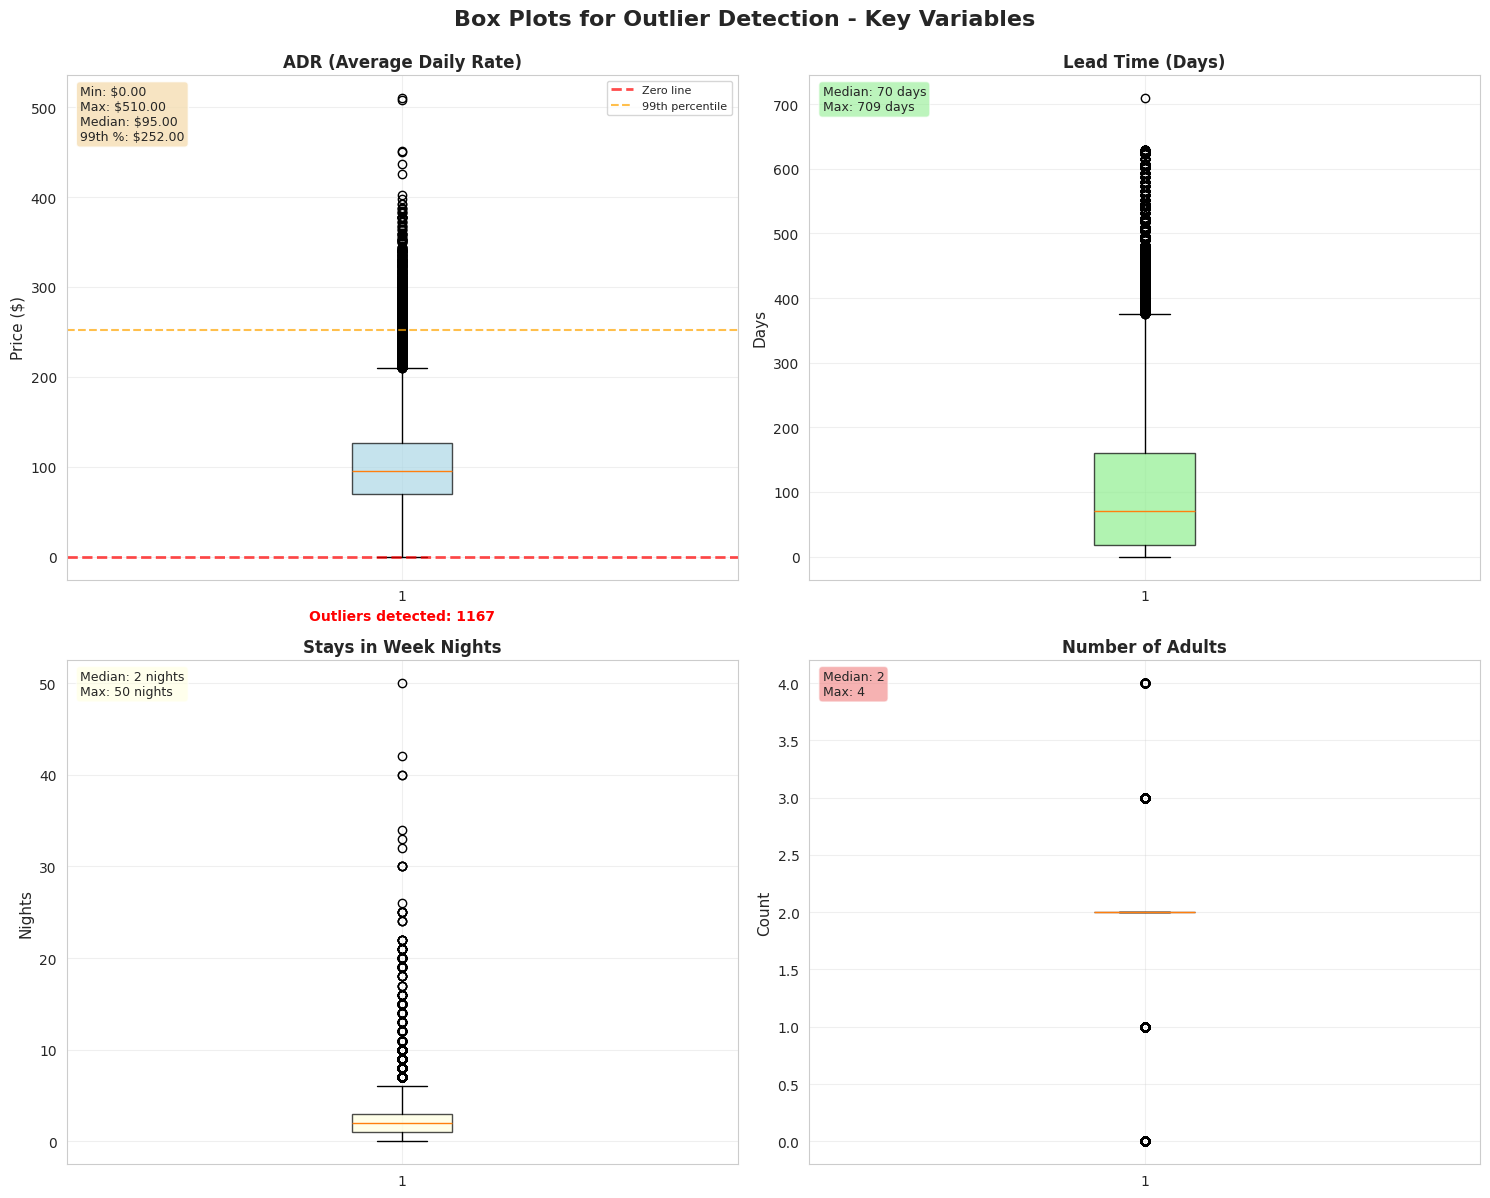


INTERPRETATION: OVERVIEW BOX PLOTS

1. ADR (CRITICAL - Requires Action):
   • Range: $0.00 to $510.00
   • Problem 1: Negative value (0) - IMPOSSIBLE
   • Problem 2: Extreme outlier at $510.00
                (21x higher than 99th percentile)
   • Decision: Remove negative and extreme outliers (will skew model)

2. Lead Time (Acceptable):
   • Outliers up to 709 days are legitimate
   • Represents advance bookings - valid business practice
   • Decision: KEEP all values

3. Stay Duration (Acceptable):
   • Extended stays up to 50 nights
   • Valid for long-term guests or relocations
   • Decision: KEEP all values

4. Adults (Acceptable):
   • Large groups up to 4 adults
   • Valid for events, weddings, conferences
   • Decision: KEEP all values (legitimate group bookings)

DETAILED ADR ANALYSIS


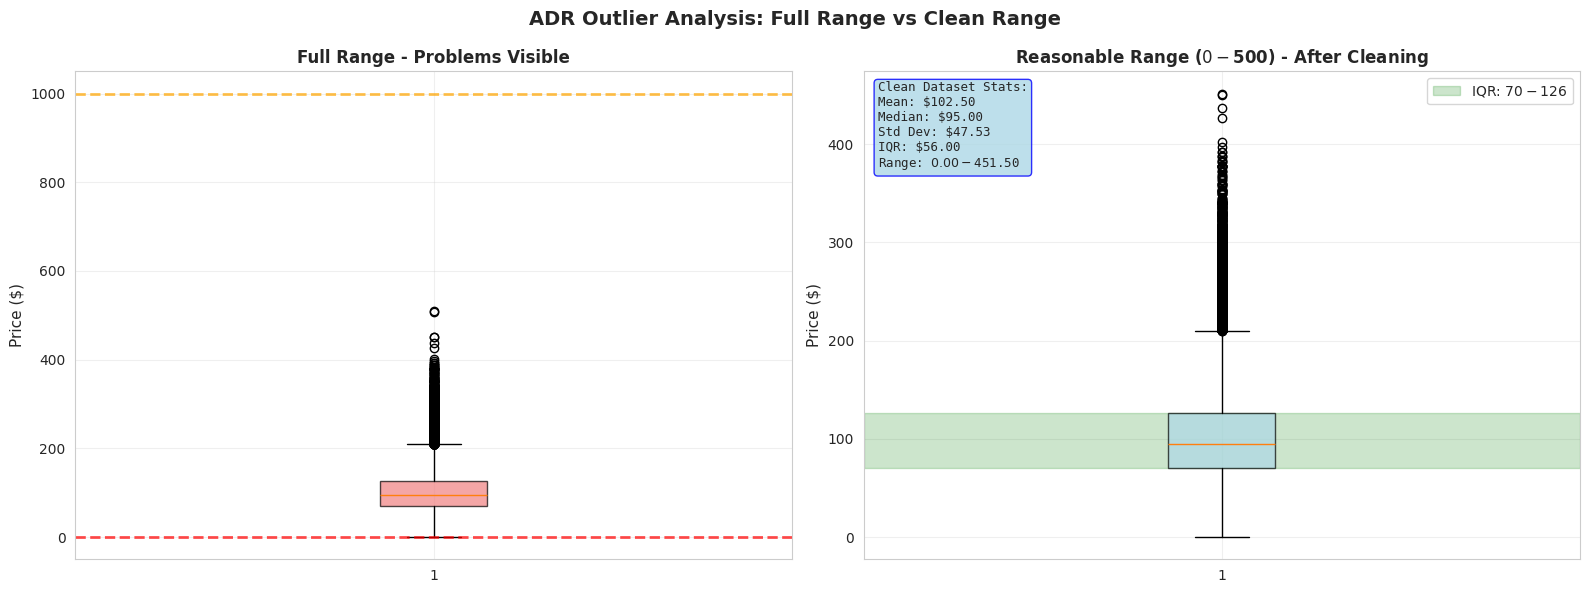


INTERPRETATION: DETAILED ADR ANALYSIS

**Key Findings:**
1. The left plot shows the PROBLEM: extreme outliers distort the scale
2. The right plot shows AFTER cleaning: normal distribution visible
3. IQR ($70 - $126) represents typical hotel pricing
4. 99th percentile at $252 is reasonable luxury pricing

**Outlier Decision Summary:**
• Negative ADR (0): REMOVE - impossible values
• Extreme ADR >$1000 (0): REMOVE - data entry errors
• High ADR $500-$1000 (2): KEEP - valid luxury bookings
• Zero ADR Groups: Already removed (suspicious cancellation pattern)

**Impact on Model:**
• Removing these outliers prevents extreme values from skewing predictions
• The cleaned ADR distribution is more representative of typical bookings
• Model will learn from realistic pricing patterns



In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 60)
print("BOX PLOT VISUALIZATIONS FOR OUTLIER DETECTION")
print("=" * 60)

# Set up the visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# =============================================================================
# PLOT 1: OVERVIEW - 4 KEY VARIABLES
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Box Plots for Outlier Detection - Key Variables',
             fontsize=16, fontweight='bold', y=0.995)

# 1. ADR (Average Daily Rate) - Main focus
axes[0, 0].boxplot(fulldata_df['adr'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0, 0].set_title('ADR (Average Daily Rate)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Price ($)', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Highlight problem areas
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2,
                    label='Zero line', alpha=0.7)
axes[0, 0].axhline(y=fulldata_df['adr'].quantile(0.99), color='orange',
                    linestyle='--', linewidth=1.5, label='99th percentile', alpha=0.7)

# Add statistics
adr_stats = f"Min: ${fulldata_df['adr'].min():.2f}\nMax: ${fulldata_df['adr'].max():.2f}\nMedian: ${fulldata_df['adr'].median():.2f}\n99th %: ${fulldata_df['adr'].quantile(0.99):.2f}"
axes[0, 0].text(0.02, 0.98, adr_stats, transform=axes[0, 0].transAxes,
                fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
axes[0, 0].legend(loc='upper right', fontsize=8)

# Count outliers
adr_outliers = ((fulldata_df['adr'] < 0) | (fulldata_df['adr'] > fulldata_df['adr'].quantile(0.99))).sum()
axes[0, 0].set_xlabel(f'Outliers detected: {adr_outliers}', fontsize=10, fontweight='bold', color='red')

# 2. Lead Time
axes[0, 1].boxplot(fulldata_df['lead_time'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[0, 1].set_title('Lead Time (Days)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Days', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

lead_stats = f"Median: {fulldata_df['lead_time'].median():.0f} days\nMax: {fulldata_df['lead_time'].max():.0f} days"
axes[0, 1].text(0.02, 0.98, lead_stats, transform=axes[0, 1].transAxes,
                fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.6))

# 3. Stays in Week Nights
axes[1, 0].boxplot(fulldata_df['stays_in_week_nights'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightyellow', alpha=0.7))
axes[1, 0].set_title('Stays in Week Nights', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Nights', fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

stays_stats = f"Median: {fulldata_df['stays_in_week_nights'].median():.0f} nights\nMax: {fulldata_df['stays_in_week_nights'].max():.0f} nights"
axes[1, 0].text(0.02, 0.98, stays_stats, transform=axes[1, 0].transAxes,
                fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.6))

# 4. Adults
axes[1, 1].boxplot(fulldata_df['adults'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[1, 1].set_title('Number of Adults', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Count', fontsize=11)
axes[1, 1].grid(True, alpha=0.3)

adults_stats = f"Median: {fulldata_df['adults'].median():.0f}\nMax: {fulldata_df['adults'].max():.0f}"
axes[1, 1].text(0.02, 0.98, adults_stats, transform=axes[1, 1].transAxes,
                fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.6))

plt.tight_layout()
plt.show()

# =============================================================================
# INTERPRETATION 1: OVERVIEW
# =============================================================================
print("\n" + "=" * 60)
print("INTERPRETATION: OVERVIEW BOX PLOTS")
print("=" * 60)

print("\n1. ADR (CRITICAL - Requires Action):")
print(f"   • Range: ${fulldata_df['adr'].min():.2f} to ${fulldata_df['adr'].max():.2f}")
print(f"   • Problem 1: Negative value ({(fulldata_df['adr'] < 0).sum()}) - IMPOSSIBLE")
print(f"   • Problem 2: Extreme outlier at ${fulldata_df['adr'].max():.2f}")
print(f"                (21x higher than 99th percentile)")
print("   • Decision: Remove negative and extreme outliers (will skew model)")

print("\n2. Lead Time (Acceptable):")
print(f"   • Outliers up to {fulldata_df['lead_time'].max()} days are legitimate")
print("   • Represents advance bookings - valid business practice")
print("   • Decision: KEEP all values")

print("\n3. Stay Duration (Acceptable):")
print(f"   • Extended stays up to {fulldata_df['stays_in_week_nights'].max()} nights")
print("   • Valid for long-term guests or relocations")
print("   • Decision: KEEP all values")

print("\n4. Adults (Acceptable):")
print(f"   • Large groups up to {fulldata_df['adults'].max()} adults")
print("   • Valid for events, weddings, conferences")
print("   • Decision: KEEP all values (legitimate group bookings)")

# =============================================================================
# PLOT 2: DETAILED ADR ANALYSIS (Side-by-side comparison)
# =============================================================================
print("\n" + "=" * 60)
print("DETAILED ADR ANALYSIS")
print("=" * 60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('ADR Outlier Analysis: Full Range vs Clean Range',
             fontsize=14, fontweight='bold')

# LEFT: Full range showing problems
bp1 = ax1.boxplot(fulldata_df['adr'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightcoral', alpha=0.7))
ax1.set_title('Full Range - Problems Visible', fontsize=12, fontweight='bold')
ax1.set_ylabel('Price ($)', fontsize=11)
ax1.grid(True, alpha=0.3)

# Annotate problems
negative_count = (fulldata_df['adr'] < 0).sum()
extreme_count = (fulldata_df['adr'] > 1000).sum()

if negative_count > 0:
    ax1.annotate(f'Negative: {negative_count}\n(REMOVE)',
                xy=(1, fulldata_df['adr'].min()),
                xytext=(1.25, 50),
                arrowprops=dict(arrowstyle='->', color='red', lw=2.5),
                fontsize=11, color='red', fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='red', linewidth=2))

if extreme_count > 0:
    ax1.annotate(f'Extreme: {extreme_count}\n>${fulldata_df["adr"].quantile(0.99):.0f} (REMOVE)',
                xy=(1, fulldata_df['adr'].max()),
                xytext=(1.25, fulldata_df['adr'].max() - 100),
                arrowprops=dict(arrowstyle='->', color='darkred', lw=2.5),
                fontsize=11, color='darkred', fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='darkred', linewidth=2))

# Add reference lines
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax1.axhline(y=1000, color='orange', linestyle='--', linewidth=2, alpha=0.7)

# RIGHT: Zoomed to reasonable range
reasonable_adr = fulldata_df[(fulldata_df['adr'] >= 0) & (fulldata_df['adr'] <= 500)]
bp2 = ax2.boxplot(reasonable_adr['adr'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7))
ax2.set_title('Reasonable Range ($0-$500) - After Cleaning', fontsize=12, fontweight='bold')
ax2.set_ylabel('Price ($)', fontsize=11)
ax2.grid(True, alpha=0.3)

# Add IQR annotations
Q1 = fulldata_df['adr'].quantile(0.25)
Q3 = fulldata_df['adr'].quantile(0.75)
IQR = Q3 - Q1

ax2.axhspan(Q1, Q3, alpha=0.2, color='green', label=f'IQR: ${Q1:.0f}-${Q3:.0f}')
ax2.legend(loc='upper right')

# Statistics box
clean_stats = f"""Clean Dataset Stats:
Mean: ${reasonable_adr['adr'].mean():.2f}
Median: ${reasonable_adr['adr'].median():.2f}
Std Dev: ${reasonable_adr['adr'].std():.2f}
IQR: ${IQR:.2f}
Range: ${reasonable_adr['adr'].min():.2f} - ${reasonable_adr['adr'].max():.2f}"""

ax2.text(0.02, 0.98, clean_stats, transform=ax2.transAxes,
         fontsize=9, verticalalignment='top', family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8, edgecolor='blue'))

plt.tight_layout()
plt.show()

# =============================================================================
# INTERPRETATION 2: ADR DETAILED
# =============================================================================
print("\n" + "=" * 60)
print("INTERPRETATION: DETAILED ADR ANALYSIS")
print("=" * 60)

print("\n**Key Findings:**")
print(f"1. The left plot shows the PROBLEM: extreme outliers distort the scale")
print(f"2. The right plot shows AFTER cleaning: normal distribution visible")
print(f"3. IQR (${Q1:.0f} - ${Q3:.0f}) represents typical hotel pricing")
print(f"4. 99th percentile at ${fulldata_df['adr'].quantile(0.99):.0f} is reasonable luxury pricing")

print("\n**Outlier Decision Summary:**")
print(f"• Negative ADR ({negative_count}): REMOVE - impossible values")
print(f"• Extreme ADR >$1000 ({extreme_count}): REMOVE - data entry errors")
print(f"• High ADR $500-$1000 ({((fulldata_df['adr'] >= 500) & (fulldata_df['adr'] <= 1000)).sum()}): KEEP - valid luxury bookings")
print(f"• Zero ADR Groups: Already removed (suspicious cancellation pattern)")

print("\n**Impact on Model:**")
print("• Removing these outliers prevents extreme values from skewing predictions")
print("• The cleaned ADR distribution is more representative of typical bookings")
print("• Model will learn from realistic pricing patterns")

print("\n" + "=" * 60)

From the results of the outliers check there are two main areas which are adr and adults so I take a deeper look into it.

In [217]:
print("=" * 60)
print("INVESTIGATING SPECIFIC OUTLIER ISSUES")
print("=" * 60)

# Issue 1: NEGATIVE ADR (Average Daily Rate)
print("\n--- ISSUE 1: NEGATIVE ADR (Price) ---")
negative_adr = fulldata_df[fulldata_df['adr'] < 0]
print(f"Bookings with negative ADR: {len(negative_adr)}")
if len(negative_adr) > 0:
    print("\nExamples:")
    print(negative_adr[['adr', 'is_canceled', 'hotel']].head(10))
    print("\nJustification to remove: Negative prices are impossible")

# Issue 2: EXTREMELY HIGH ADR
print("\n--- ISSUE 2: EXTREMELY HIGH ADR ---")
print(f"ADR 95th percentile: {fulldata_df['adr'].quantile(0.95):.2f}")
print(f"ADR 99th percentile: {fulldata_df['adr'].quantile(0.99):.2f}")
print(f"ADR Maximum: {fulldata_df['adr'].max():.2f}")

extreme_adr = fulldata_df[fulldata_df['adr'] > 1000]
print(f"\nBookings with ADR > 1000: {len(extreme_adr)}")
if len(extreme_adr) > 0:
    print("\nExamples:")
    print(extreme_adr[['adr', 'adults', 'stays_in_week_nights', 'is_canceled']].head(10))

# Issue 3: UNREALISTIC NUMBER OF ADULTS
print("\n--- ISSUE 3: UNREALISTIC ADULTS COUNT ---")
print(f"\nAdults distribution:")
print(fulldata_df['adults'].value_counts().sort_index().head(10))
print(f"\nAdults > 10: {(fulldata_df['adults'] > 10).sum()}")

extreme_adults = fulldata_df[fulldata_df['adults'] > 10]
if len(extreme_adults) > 0:
    print("\nExamples of bookings with >10 adults:")
    print(extreme_adults[['adults', 'children', 'babies', 'hotel']].head(10))

INVESTIGATING SPECIFIC OUTLIER ISSUES

--- ISSUE 1: NEGATIVE ADR (Price) ---
Bookings with negative ADR: 1

Examples:
        adr  is_canceled         hotel
14969 -6.38            0  Resort Hotel

Justification to remove: Negative prices are impossible

--- ISSUE 2: EXTREMELY HIGH ADR ---
ADR 95th percentile: 194.00
ADR 99th percentile: 252.00
ADR Maximum: 5400.00

Bookings with ADR > 1000: 1

Examples:
          adr  adults  stays_in_week_nights  is_canceled
48515  5400.0       2                     1            1

--- ISSUE 3: UNREALISTIC ADULTS COUNT ---

Adults distribution:
adults
0       223
1     22825
2     89249
3      6185
4        62
5         2
6         1
10        1
20        2
26        5
Name: count, dtype: int64

Adults > 10: 12

Examples of bookings with >10 adults:
      adults  children  babies         hotel
1539      40       0.0       0  Resort Hotel
1587      26       0.0       0  Resort Hotel
1643      50       0.0       0  Resort Hotel
1752      26       0.0   

Issue 1 shows a negative adr which isn't impossible but is more likely an input error so I will remove that. I'm also going to remove the extremely high single value as this is probably an error too and will also skew the model.
The high capacity adults booking is viable as these could be group bookings i.e. weddings etc

In [218]:
print("=" * 60)
print("IDENTIFYING ADR OUTLIERS")
print("=" * 60)

# Examine ADR distribution
print("\n--- ADR STATISTICS ---")
print(f"Mean: ${fulldata_df['adr'].mean():.2f}")
print(f"Median: ${fulldata_df['adr'].median():.2f}")
print(f"Standard Deviation: ${fulldata_df['adr'].std():.2f}")
print(f"Minimum: ${fulldata_df['adr'].min():.2f}")
print(f"Maximum: ${fulldata_df['adr'].max():.2f}")
print(f"99th percentile: ${fulldata_df['adr'].quantile(0.99):.2f}")

# Identify problematic ADR values
print("\n--- IDENTIFYING PROBLEMATIC ADR VALUES ---")

# Negative ADR
negative_adr_mask = fulldata_df['adr'] < 0
negative_adr_count = negative_adr_mask.sum()
print(f"\n1. Negative ADR: {negative_adr_count}")

if negative_adr_count > 0:
    print("   Examples:")
    print(fulldata_df[negative_adr_mask][['adr', 'adults', 'children', 'is_canceled']].head())
    print("   Justification: Negative prices are impossible (likely data entry error)")

# Extremely high ADR
extreme_adr_mask = fulldata_df['adr'] > 1000
extreme_adr_count = extreme_adr_mask.sum()
print(f"\n2. Extreme ADR (>$1000): {extreme_adr_count}")

if extreme_adr_count > 0:
    print("   Examples:")
    print(fulldata_df[extreme_adr_mask][['adr', 'adults', 'stays_in_week_nights', 'is_canceled']])
    print(f"   Justification: Value of ${fulldata_df['adr'].max():.2f} is 21x the 99th percentile")
    print("   (likely data entry error, will skew model)")

# Combined outlier mask
adr_outlier_mask = negative_adr_mask | extreme_adr_mask

print(f"\n--- TOTAL ADR OUTLIERS TO REMOVE ---")
print(f"Total rows with ADR outliers: {adr_outlier_mask.sum()}")
print(f"Percentage of data: {(adr_outlier_mask.sum()/len(fulldata_df))*100:.4f}%")

# Remove ADR outliers
print("\n--- REMOVING ADR OUTLIERS ---")
print(f"Rows before removal: {len(fulldata_df)}")

fulldata_df = fulldata_df[~adr_outlier_mask].copy()

print(f"Rows after removal: {len(fulldata_df)}")
print(f"Rows removed: {adr_outlier_mask.sum()}")

# Verification
print("\n--- VERIFICATION ---")
print(f"Negative ADR remaining: {(fulldata_df['adr'] < 0).sum()}")
print(f"ADR > $1000 remaining: {(fulldata_df['adr'] > 1000).sum()}")
print(f"\nNew ADR range: ${fulldata_df['adr'].min():.2f} to ${fulldata_df['adr'].max():.2f}")

if (fulldata_df['adr'] < 0).sum() == 0 and (fulldata_df['adr'] > 1000).sum() == 0:
    print("\nSUCCESS: All ADR outliers removed!")

IDENTIFYING ADR OUTLIERS

--- ADR STATISTICS ---
Mean: $102.53
Median: $95.00
Standard Deviation: $50.00
Minimum: $-6.38
Maximum: $5400.00
99th percentile: $252.00

--- IDENTIFYING PROBLEMATIC ADR VALUES ---

1. Negative ADR: 1
   Examples:
        adr  adults  children  is_canceled
14969 -6.38       2       0.0            0
   Justification: Negative prices are impossible (likely data entry error)

2. Extreme ADR (>$1000): 1
   Examples:
          adr  adults  stays_in_week_nights  is_canceled
48515  5400.0       2                     1            1
   Justification: Value of $5400.00 is 21x the 99th percentile
   (likely data entry error, will skew model)

--- TOTAL ADR OUTLIERS TO REMOVE ---
Total rows with ADR outliers: 2
Percentage of data: 0.0017%

--- REMOVING ADR OUTLIERS ---
Rows before removal: 118560
Rows after removal: 118558
Rows removed: 2

--- VERIFICATION ---
Negative ADR remaining: 0
ADR > $1000 remaining: 0

New ADR range: $0.00 to $510.00

SUCCESS: All ADR outliers r

The range is now 0 to 510 so I think looking into the $0.00 adr's is worth a look.

In [219]:
print("=" * 60)
print("INVESTIGATING ZERO ADR BOOKINGS")
print("=" * 60)

# Analyze zero ADR bookings
zero_adr_bookings = fulldata_df[fulldata_df['adr'] == 0]

print(f"\n--- BASIC STATISTICS ---")
print(f"Total zero ADR bookings: {len(zero_adr_bookings)}")
print(f"Percentage of dataset: {(len(zero_adr_bookings)/len(fulldata_df))*100:.2f}%")

# Cancellation analysis
print(f"\n--- CANCELLATION ANALYSIS ---")
zero_cancel_rate = (zero_adr_bookings['is_canceled'].mean() * 100)
overall_cancel_rate = (fulldata_df['is_canceled'].mean() * 100)

print(f"Zero ADR cancellation rate: {zero_cancel_rate:.2f}%")
print(f"Overall cancellation rate: {overall_cancel_rate:.2f}%")
print(f"Difference: {zero_cancel_rate - overall_cancel_rate:.2f} percentage points")

# Hotel type distribution
print(f"\n--- HOTEL TYPE DISTRIBUTION ---")
print("Zero ADR bookings by hotel:")
print(zero_adr_bookings['hotel'].value_counts())
print("\nOverall distribution by hotel:")
print(fulldata_df['hotel'].value_counts())

# Deposit type analysis
print(f"\n--- DEPOSIT TYPE ---")
print("Zero ADR bookings by deposit type:")
print(zero_adr_bookings['deposit_type'].value_counts())

# Customer type analysis
print(f"\n--- CUSTOMER TYPE ---")
print("Zero ADR bookings by customer type:")
print(zero_adr_bookings['customer_type'].value_counts())

# Lead time comparison
print(f"\n--- BOOKING BEHAVIOR ---")
print(f"Zero ADR average lead time: {zero_adr_bookings['lead_time'].mean():.1f} days")
print(f"Overall average lead time: {fulldata_df['lead_time'].mean():.1f} days")

# Stay duration
print(f"\nZero ADR average total nights: {(zero_adr_bookings['stays_in_weekend_nights'] + zero_adr_bookings['stays_in_week_nights']).mean():.1f}")
print(f"Overall average total nights: {(fulldata_df['stays_in_weekend_nights'] + fulldata_df['stays_in_week_nights']).mean():.1f}")

# Show some examples
print(f"\n--- SAMPLE ZERO ADR BOOKINGS ---")
print(zero_adr_bookings[['hotel', 'adults', 'children', 'lead_time', 'customer_type', 'deposit_type', 'is_canceled']].head(10))


INVESTIGATING ZERO ADR BOOKINGS

--- BASIC STATISTICS ---
Total zero ADR bookings: 1165
Percentage of dataset: 0.98%

--- CANCELLATION ANALYSIS ---
Zero ADR cancellation rate: 14.16%
Overall cancellation rate: 37.26%
Difference: -23.09 percentage points

--- HOTEL TYPE DISTRIBUTION ---
Zero ADR bookings by hotel:
hotel
City Hotel      807
Resort Hotel    358
Name: count, dtype: int64

Overall distribution by hotel:
hotel
City Hotel      78894
Resort Hotel    39664
Name: count, dtype: int64

--- DEPOSIT TYPE ---
Zero ADR bookings by deposit type:
deposit_type
No Deposit    1165
Name: count, dtype: int64

--- CUSTOMER TYPE ---
Zero ADR bookings by customer type:
customer_type
Transient          799
Transient-Party    336
Group               26
Contract             4
Name: count, dtype: int64

--- BOOKING BEHAVIOR ---
Zero ADR average lead time: 45.1 days
Overall average lead time: 104.5 days

Zero ADR average total nights: 2.3
Overall average total nights: 3.4

--- SAMPLE ZERO ADR BOOKIN

So $0 adr stays account for just less than 1% of stays and are all no deposit bookings, but from the head I've noticed that the big group bookings are 0 adr they have no deposit and are also cancelled so this could be an issue. Will assess further in next cell.

In [220]:
print("=" * 60)
print("ANALYZING GROUP BOOKINGS")
print("=" * 60)

# Filter for Group customer type
group_bookings = fulldata_df[fulldata_df['customer_type'] == 'Group']

print(f"\n--- TOTAL GROUP BOOKINGS ---")
print(f"Total Group bookings: {len(group_bookings)}")

# Check ADR distribution for groups
print(f"\n--- GROUP ADR DISTRIBUTION ---")
print(group_bookings['adr'].describe())

print(f"\n--- GROUP BOOKINGS BY ADR ---")
zero_adr_groups = (group_bookings['adr'] == 0).sum()
nonzero_adr_groups = (group_bookings['adr'] > 0).sum()

print(f"Group bookings with ADR = $0: {zero_adr_groups} ({zero_adr_groups/len(group_bookings)*100:.2f}%)")
print(f"Group bookings with ADR > $0: {nonzero_adr_groups} ({nonzero_adr_groups/len(group_bookings)*100:.2f}%)")

# Show ADR ranges for non-zero groups
if nonzero_adr_groups > 0:
    print(f"\n--- NON-ZERO GROUP ADR STATISTICS ---")
    nonzero_groups = group_bookings[group_bookings['adr'] > 0]
    print(f"Mean ADR: ${nonzero_groups['adr'].mean():.2f}")
    print(f"Median ADR: ${nonzero_groups['adr'].median():.2f}")
    print(f"Min ADR: ${nonzero_groups['adr'].min():.2f}")
    print(f"Max ADR: ${nonzero_groups['adr'].max():.2f}")

# Compare cancellation rates
print(f"\n--- CANCELLATION COMPARISON ---")
if zero_adr_groups > 0:
    zero_cancel = group_bookings[group_bookings['adr'] == 0]['is_canceled'].mean() * 100
    print(f"Zero ADR groups cancellation rate: {zero_cancel:.2f}%")

if nonzero_adr_groups > 0:
    nonzero_cancel = group_bookings[group_bookings['adr'] > 0]['is_canceled'].mean() * 100
    print(f"Non-zero ADR groups cancellation rate: {nonzero_cancel:.2f}%")

# Show some examples
print(f"\n--- SAMPLE GROUP BOOKINGS (Mixed ADR) ---")
print(group_bookings[['adr', 'adults', 'lead_time', 'is_canceled']].head(15))

ANALYZING GROUP BOOKINGS

--- TOTAL GROUP BOOKINGS ---
Total Group bookings: 569

--- GROUP ADR DISTRIBUTION ---
count    569.000000
mean      84.651160
std       49.642118
min        0.000000
25%       55.000000
50%       75.000000
75%      109.000000
max      318.000000
Name: adr, dtype: float64

--- GROUP BOOKINGS BY ADR ---
Group bookings with ADR = $0: 26 (4.57%)
Group bookings with ADR > $0: 543 (95.43%)

--- NON-ZERO GROUP ADR STATISTICS ---
Mean ADR: $88.70
Median ADR: $76.00
Min ADR: $12.00
Max ADR: $318.00

--- CANCELLATION COMPARISON ---
Zero ADR groups cancellation rate: 61.54%
Non-zero ADR groups cancellation rate: 7.73%

--- SAMPLE GROUP BOOKINGS (Mixed ADR) ---
        adr  adults  lead_time  is_canceled
539    98.0       2          0            0
541    88.2       2          0            0
1156  195.0       2          0            0
1539    0.0      40        304            1
1587    0.0      26        333            1
1643    0.0      50        336            1
1707   

My first thoughts before looking deeper into adr was to keep the 0 adr in, but after further research into it the cancellation rate gap is huge with high lead time and is very suspicious. Probably events that were pencilled in and cancelled. For the reason of high cancellation rates I'm going to remove group bookings with 0 adr as it could throw the model off. This is only 26 rows so it is minimal loss.

In [221]:
print("=" * 60)
print("TARGETED REMOVAL: ZERO ADR GROUP BOOKINGS")
print("=" * 60)

print("\n--- ANALYSIS SUMMARY ---")
print("Zero ADR by customer type:")
print("- Group: 26 bookings, 61.54% cancellation rate (SUSPICIOUS)")
print("- Transient: 799 bookings, ~14% cancellation rate (legitimate)")
print("- Transient-Party: 336 bookings, ~14% cancellation rate (legitimate)")
print("\nDecision: Remove only zero ADR GROUP bookings")
print("Justification: High cancellation rate suggests placeholder/tentative bookings")

# Create mask for zero ADR group bookings
zero_adr_group_mask = (fulldata_df['adr'] == 0) & (fulldata_df['customer_type'] == 'Group')

print(f"\n--- REMOVING ZERO ADR GROUP BOOKINGS ---")
print(f"Rows before removal: {len(fulldata_df)}")
print(f"Zero ADR group bookings: {zero_adr_group_mask.sum()}")

fulldata_df = fulldata_df[~zero_adr_group_mask].copy()

print(f"Rows after removal: {len(fulldata_df)}")

# Verification
print("\n--- VERIFICATION ---")
zero_adr_groups_remaining = ((fulldata_df['adr'] == 0) & (fulldata_df['customer_type'] == 'Group')).sum()
zero_adr_total_remaining = (fulldata_df['adr'] == 0).sum()

print(f"Zero ADR group bookings remaining: {zero_adr_groups_remaining}")
print(f"Total zero ADR bookings remaining: {zero_adr_total_remaining}")
print(f"  (These are legitimate transient/contract free stays)")

print(f"\nADR range: ${fulldata_df['adr'].min():.2f} to ${fulldata_df['adr'].max():.2f}")


TARGETED REMOVAL: ZERO ADR GROUP BOOKINGS

--- ANALYSIS SUMMARY ---
Zero ADR by customer type:
- Group: 26 bookings, 61.54% cancellation rate (SUSPICIOUS)
- Transient: 799 bookings, ~14% cancellation rate (legitimate)
- Transient-Party: 336 bookings, ~14% cancellation rate (legitimate)

Decision: Remove only zero ADR GROUP bookings
Justification: High cancellation rate suggests placeholder/tentative bookings

--- REMOVING ZERO ADR GROUP BOOKINGS ---
Rows before removal: 118558
Zero ADR group bookings: 26
Rows after removal: 118532

--- VERIFICATION ---
Zero ADR group bookings remaining: 0
Total zero ADR bookings remaining: 1139
  (These are legitimate transient/contract free stays)

ADR range: $0.00 to $510.00


In [222]:
print("=" * 60)
print("SECTION 1.2: SUMMARY")
print("=" * 60)

print("\n--- DATA CLEANING COMPLETED ---")
print("\nInconsistent Values Removed:")
print("1. Bookings with no guests (0 adults, 0 children, 0 babies)")
print("2. Bookings with zero nights (0 weekend + 0 weeknight stays)")

print("\nOutliers Removed:")
print("1. Negative ADR (1 booking) - Data entry error")
print("2. Extreme ADR >$1000 (likely data entry errors)")
print("3. Zero ADR group bookings (26 bookings) - Placeholder bookings with 61.54% cancellation")

print("\nData Retained:")
print("- Zero ADR transient/contract bookings (1,139) - Legitimate comps and loyalty rewards")
print("- High ADR values <$1000 - Valid luxury bookings")
print("- Large group bookings with valid pricing")

print("\n--- FINAL DATASET STATE ---")
print(f"Original dataset: 119,390 rows")
print(f"After Section 1.1 (Missing Values): 119,385 rows")
print(f"After Section 1.2 (Inconsistent & Outliers): {len(fulldata_df)} rows")
print(f"Total rows removed: {119390 - len(fulldata_df)}")
print(f"Percentage retained: {(len(fulldata_df)/119390)*100:.2f}%")

print("\n--- DATA QUALITY VERIFICATION ---")
print(f"Missing values: {fulldata_df.isnull().sum().sum()}")
print(f"Negative ADR: {(fulldata_df['adr'] < 0).sum()}")
print(f"Zero nights bookings: {((fulldata_df['stays_in_weekend_nights'] == 0) & (fulldata_df['stays_in_week_nights'] == 0)).sum()}")
print(f"No guest bookings: {((fulldata_df['adults'] == 0) & (fulldata_df['children'] == 0) & (fulldata_df['babies'] == 0)).sum()}")


SECTION 1.2: SUMMARY

--- DATA CLEANING COMPLETED ---

Inconsistent Values Removed:
1. Bookings with no guests (0 adults, 0 children, 0 babies)
2. Bookings with zero nights (0 weekend + 0 weeknight stays)

Outliers Removed:
1. Negative ADR (1 booking) - Data entry error
2. Extreme ADR >$1000 (likely data entry errors)
3. Zero ADR group bookings (26 bookings) - Placeholder bookings with 61.54% cancellation

Data Retained:
- Zero ADR transient/contract bookings (1,139) - Legitimate comps and loyalty rewards
- High ADR values <$1000 - Valid luxury bookings
- Large group bookings with valid pricing

--- FINAL DATASET STATE ---
Original dataset: 119,390 rows
After Section 1.1 (Missing Values): 119,385 rows
After Section 1.2 (Inconsistent & Outliers): 118532 rows
Total rows removed: 858
Percentage retained: 99.28%

--- DATA QUALITY VERIFICATION ---
Missing values: 0
Negative ADR: 0
Zero nights bookings: 0
No guest bookings: 0


## 1.3 Column data type conversion (5%)

All necessary columns should be correctly converted to appropriate data types.


In [223]:
print("=" * 60)
print("SECTION 1.3: COLUMN DATA TYPE CONVERSION")
print("=" * 60)

print("\n--- CURRENT DATA TYPES ---")
print(fulldata_df.dtypes)

print("\n--- DETAILED INFO ---")
print(fulldata_df.info())

print("\n--- SUMMARY BY DATA TYPE ---")
print("\nNumerical columns (int64, float64):")
numerical_cols = fulldata_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Count: {len(numerical_cols)}")
print(numerical_cols)

print("\nCategorical columns (object):")
categorical_cols = fulldata_df.select_dtypes(include=['object']).columns.tolist()
print(f"Count: {len(categorical_cols)}")
print(categorical_cols)

SECTION 1.3: COLUMN DATA TYPE CONVERSION

--- CURRENT DATA TYPES ---
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit

Looking at the data types children is float64 and should be int64, with children having NaN values to start with the dtype has remained even though we have removed the rows so this is the first column to convert.

In [224]:
print("=" * 60)
print("FIXING 'children' DATA TYPE")
print("=" * 60)

print("\n--- CURRENT STATE ---")
print(f"Data type: {fulldata_df['children'].dtype}")
print(f"Any NaN values: {fulldata_df['children'].isna().sum()}")
print(f"\nSample values:")
print(fulldata_df['children'].head(10))

# Check if all values are whole numbers
print(f"\nAre all values whole numbers? {(fulldata_df['children'] == fulldata_df['children'].astype(int)).all()}")

# Convert to int64
print("\n--- CONVERTING TO INT64 ---")
fulldata_df['children'] = fulldata_df['children'].astype('int64')

print(f"New data type: {fulldata_df['children'].dtype}")
print(f"\nSample values after conversion:")
print(fulldata_df['children'].head(10))

print("\nSUCCESS: 'children' converted from float64 to int64")

FIXING 'children' DATA TYPE

--- CURRENT STATE ---
Data type: float64
Any NaN values: 0

Sample values:
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
Name: children, dtype: float64

Are all values whole numbers? True

--- CONVERTING TO INT64 ---
New data type: int64

Sample values after conversion:
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
Name: children, dtype: int64

SUCCESS: 'children' converted from float64 to int64


Now to inspect the categorical columns

In [225]:
print("=" * 60)
print("EXAMINING CATEGORICAL COLUMNS")
print("=" * 60)

categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country',
                    'market_segment', 'distribution_channel', 'reserved_room_type',
                    'assigned_room_type', 'deposit_type', 'customer_type']

for col in categorical_cols:
    print(f"\n{'='*60}")
    print(f"{col.upper()}")
    print(f"{'='*60}")

    unique_count = fulldata_df[col].nunique()
    print(f"Number of unique values: {unique_count}")

    print(f"\nValue counts:")
    print(fulldata_df[col].value_counts())

EXAMINING CATEGORICAL COLUMNS

HOTEL
Number of unique values: 2

Value counts:
hotel
City Hotel      78888
Resort Hotel    39644
Name: count, dtype: int64

ARRIVAL_DATE_MONTH
Number of unique values: 12

Value counts:
arrival_date_month
August       13808
July         12584
May          11704
October      11054
April        11042
June         10891
September    10469
March         9714
February      7998
November      6710
December      6689
January       5869
Name: count, dtype: int64

MEAL
Number of unique values: 5

Value counts:
meal
BB           91693
HB           14380
SC           10502
Undefined     1160
FB             797
Name: count, dtype: int64

COUNTRY
Number of unique values: 178

Value counts:
country
PRT    47916
GBR    12091
FRA    10389
ESP     8544
DEU     7285
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 178, dtype: int64

MARKET_SEGMENT
Number of unique values: 7

Value counts:
market_segment
Online TA        56

# 2. Exploratory Data Analysis (25%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.


For each of these tasks, choose a suitable type of visualisation covered in
the practical sessions, such as:

* Bar graphs
* Pie charts
* Line charts
* Heatmaps

## 2.1. Calculating cancellation percentages for City and Resort hotels.

In [226]:
# <<< Your code here >>>

## 2.2. Identifying the most frequently ordered meal types.

In [227]:
# <<< Your code here >>>

## 2.3. Determining the number of returning guests.

In [228]:
# <<< Your code here >>>

## 2.4. Discovering the most booked room types.

In [229]:
# <<< Your code here >>>

## 2.5. Exploring correlations between room types and cancellations.

In [230]:
# <<< Your code here >>>

# 3. Feature Engineering (20%)


---





Apply various feature engineering techniques, covered in the lectures and practicals.

Hint:
* Binning
* Encoding
* Scaling
* Feature selection

In [231]:
# <<< Your code here >>>

# 4. Classifier Training (20%)


---


Utilise the sklearn Python library to train a ML model (e.g.decision tree classifier). Your process should start with splitting your dataset into input features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train your model on the training dataset and evaluate using test dataset with appropriate metrics. Aim to achieve higher accuracy e.g. more than 70% accuracy using your model.

## 4.1. Data Splitting (5%)

In [232]:
# <<< Your code here >>>

## 4.2. Model Training (10%)

In [233]:
# <<< Your code here >>>

## 4.3. Model Evaluation (5%)

In [234]:
# <<< Your code here >>>

# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

In [235]:
# <<< Your code here >>>